In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import segmentation
from skimage.filters import rank
from skimage.morphology import disk
from scipy import ndimage as ndi
from skimage import io
from skimage.feature import canny

In [10]:
img_path = "data/imgs/photo_0a0d189aa10b3a4fecb7bba7e859ccc06e50df37.jpg"
img = io.imread(img_path, as_gray=True)

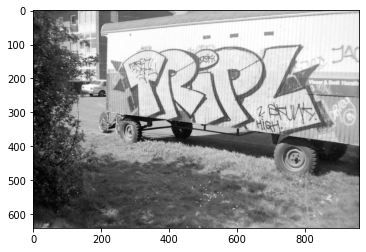

In [11]:
plt.imshow(img, cmap="gray")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


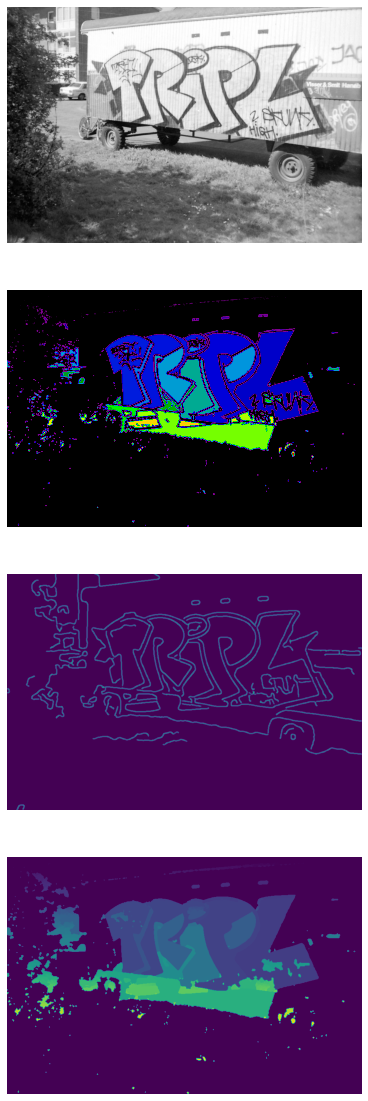

In [24]:
#denoised = rank.median(img)
markers = rank.gradient(img, disk(2)) < 55
markers = ndi.label(markers)[0]
gradient = canny(img, sigma=4)
#gradient = rank.gradient(denoised, disk(2)) > 100


segmentation_letters = segmentation.watershed(gradient, markers)

fig, axes = plt.subplots(4, 1, figsize=(15, 20))
axes[0].imshow(img, cmap="gray")
axes[0].axis('off')

axes[1].imshow(markers, cmap=plt.cm.nipy_spectral)
axes[1].axis('off')

# turn non part segments to 0 (black)
axes[2].imshow(gradient, interpolation='gaussian')
axes[2].axis('off')

axes[3].imshow(segmentation_letters, cmap="viridis")
axes[3].axis('off')

plt.show()


In [25]:
unique_values, counts = np.unique(segmentation_letters.flatten(), return_counts=True)
sorted_indices = np.argsort(-counts)

# Get the 5 biggest masks. The first one is the background, but the following are the letters
for i in range(5):  # Change 5 to the number of top values you want
    print(f"Value: {unique_values[sorted_indices[i]]}, Count: {counts[sorted_indices[i]]}")



Value: 1, Count: 452539
Value: 177, Count: 25029
Value: 619, Count: 18570
Value: 194, Count: 15192
Value: 209, Count: 12624


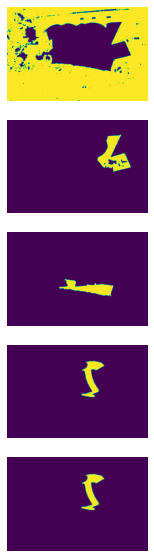

In [26]:
fig, axes = plt.subplots(5, 1, figsize=(15, 10))

unique_segment_0 = np.where(segmentation_letters != 1, 0, 1)
axes[0].imshow(unique_segment_0)
axes[0].axis('off')

unique_segment_1 = np.where(segmentation_letters != 177, 0, 1)
axes[1].imshow(unique_segment_1)
axes[1].axis('off')

unique_segment_2 = np.where(segmentation_letters != 619, 0, 1)
axes[2].imshow(unique_segment_2)
axes[2].axis('off')

unique_segment_3 = np.where(segmentation_letters != 194, 0, 1)
axes[3].imshow(unique_segment_3)
axes[3].axis('off')

unique_segment_4 = np.where(segmentation_letters != 209, 0, 1)
axes[4].imshow(unique_segment_3)
axes[4].axis('off')

plt.show()

In [75]:
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation

processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-base-coco-panoptic")
model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-base-coco-panoptic")

In [80]:
from PIL import Image
import torch
image = Image.open(img_path)

In [81]:
inputs = processor(image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

In [82]:
prediction = processor.post_process_panoptic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
print(prediction.keys())

`label_ids_to_fuse` unset. No instance will be fused.


dict_keys(['segmentation', 'segments_info'])


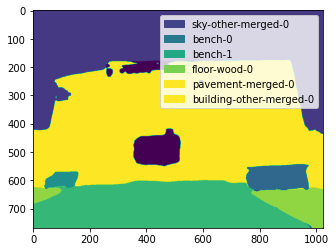

In [84]:
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm

def draw_panoptic_segmentation(segmentation, segments_info):
    # get the used color map
    viridis = cm.get_cmap('viridis', torch.max(segmentation))
    fig, ax = plt.subplots()
    ax.imshow(segmentation)
    instances_counter = defaultdict(int)
    handles = []
    # for each segment, draw its legend
    for segment in segments_info:
        segment_id = segment['id']
        segment_label_id = segment['label_id']
        segment_label = model.config.id2label[segment_label_id]
        label = f"{segment_label}-{instances_counter[segment_label_id]}"
        instances_counter[segment_label_id] += 1
        color = viridis(segment_id)
        handles.append(mpatches.Patch(color=color, label=label))
        
    ax.legend(handles=handles)

draw_panoptic_segmentation(**prediction)

In [112]:
img_path = "hopes.jpeg"
img = io.imread(img_path)

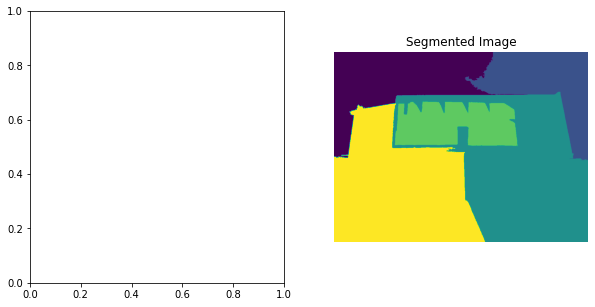

In [143]:
from skimage import io, color, filters, measure, morphology
from matplotlib import colors
from skimage.segmentation import mark_boundaries

#image_gray = color.rgb2gray(image)
edge_image = canny(image_gray, sigma=7) 
#labeled_image = measure.label(gradient)
#dilated_image = morphology.binary_dilation(edge_image)
segments = segmentation.slic(img, n_segments=10, compactness=5)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# ax[0].imshow(edge_image, cmap='gray')
# ax[0].set_title('Edge Image')
# ax[0].axis('off')

ax[1].imshow(segments)
ax[1].set_title('Segmented Image')
ax[1].axis('off')

plt.show()

In [114]:
g

NameError: name 'g' is not defined